<a href="https://colab.research.google.com/github/Santiago-iwnl/PDS_FINAL/blob/main/PROYECTO_FINAL_PDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [949]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from IPython.display import Audio
from scipy.io.wavfile import read
import scipy.signal as sp
import warnings
warnings.simplefilter("ignore", np.ComplexWarning)
from matplotlib.pylab import *

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. filtros FIR por método de enventanado.

Se grafica la señal de animales tanto en el tiempo como en el espectro.

<ipython-input-950-2e162eb03d0e>:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_1, Audio_1=read(file_audio)


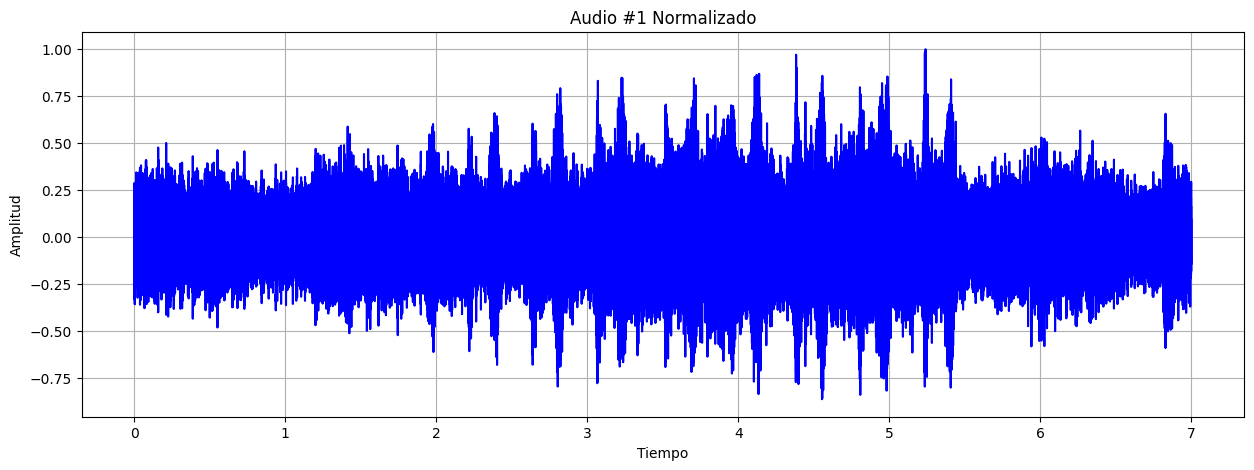

In [950]:

# Ruta del archivo con la señal.
file_audio = "/content/drive/MyDrive/Laboratorios PDS/Proyecto final/Tropical Forest Ambience ASMR.wav"

# Se extrae la Fs y el contenido del audio.
fs_1, Audio_1=read(file_audio)
# Se normaliza el audio
Norm_Audio_1 = Audio_1 / np.max(np.abs(Audio_1))

# Vector de tiempo para visualizar el audio en el tiempo.
t_1 = np.arange(0, len(Norm_Audio_1) / fs_1, 1.0 / fs_1)

# Se grafica el audio en el tiempo.
plt.figure(figsize=(15, 5))
plt.plot(t_1, Norm_Audio_1, 'b')
plt.title("Audio #1 Normalizado")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()

# Reproducir el audio normalizado
Audio(Norm_Audio_1, rate=fs_1)


ESPECTRO AUDIO.

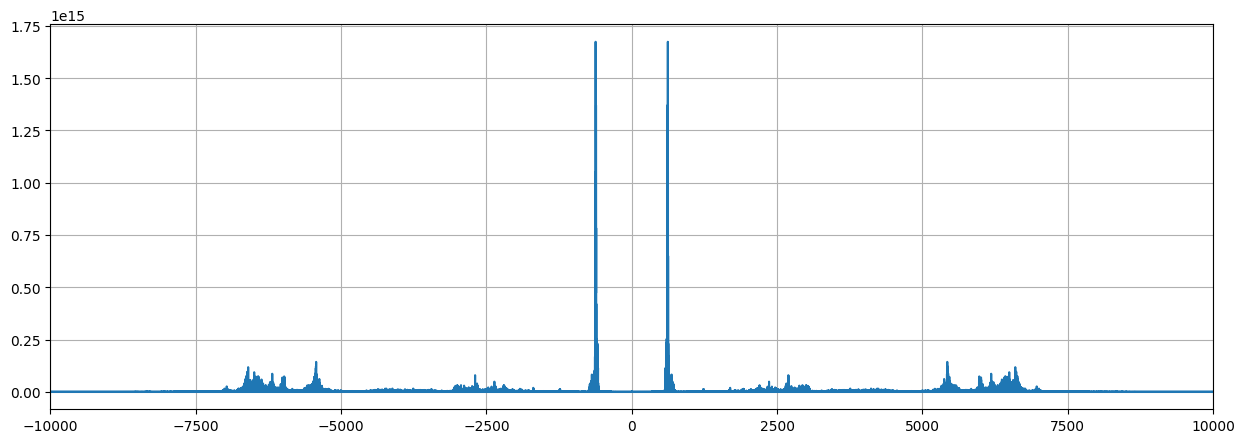

In [951]:
signal_specteum=np.fft.fft(Audio_1)
signal_specteum_frec=np.fft.fftfreq(len(Audio_1))*fs_1

plt.figure(figsize=(15, 5))
plt.plot(signal_specteum_frec, abs(signal_specteum)**2)
plt.xlim([-10000,10000])
plt.grid()
plt.show()

FILTRO FIR PASA BAJAS. :D

De este filtro, se tiene una frecuencioa de corte de 300Hz y una frecuencia de muestreo de 200 Hz.

In [952]:
#CARACTERISTICAS DEL FILTRO
print("Frecuencia de muestreo del audio: ",fs_1)
fc_pb=1500
fm_pb=500

#ripple
ripple_dB=20*np.log10(0.003)
print("El valor del ripple es de: ", int(ripple_dB),"dB")

Frecuencia de muestreo del audio:  44100
El valor del ripple es de:  -50 dB


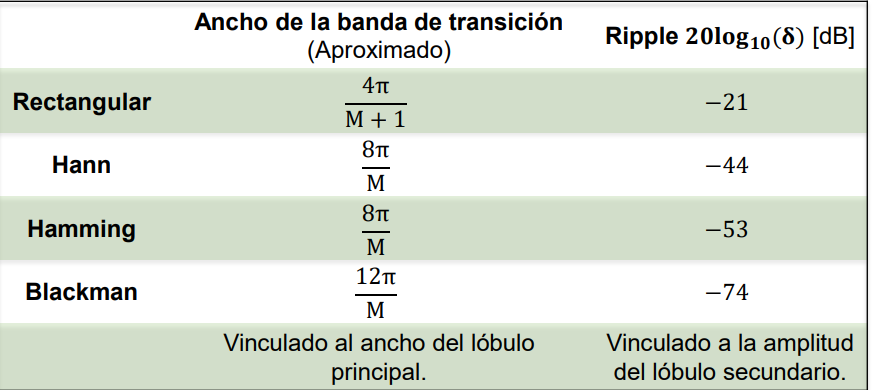

Con este valor, la ventana mas conveniente será la Hamming

In [953]:
#Orden del filtro
M=4*fs_1/fm_pb
if M%2==0:
  M+=1
print(M,"Será el orden del filtro")
print("El ancho de banda de transición será de: ", (8*np.pi/M))

352.8 Será el orden del filtro
El ancho de banda de transición será de:  0.07123792865282977


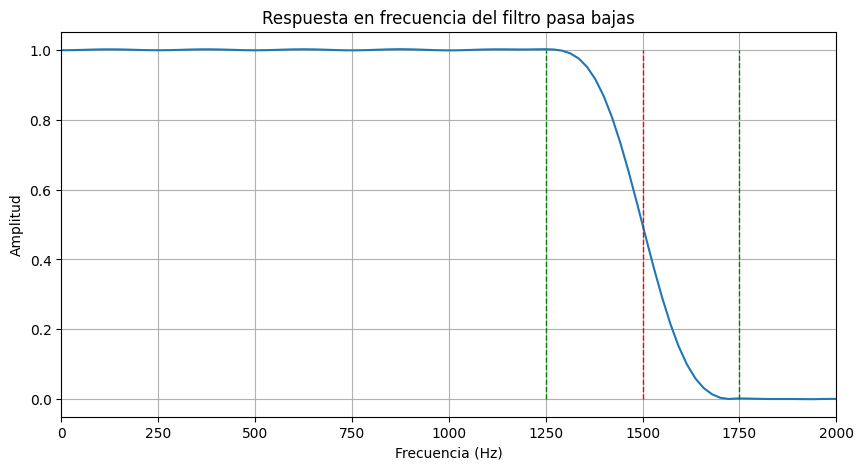

In [954]:
wc_pb = 2 * np.pi * (fc_pb / fs_1)
n = np.arange(-(M//2+1), M//2+1)

hi_pb = wc_pb/np.pi*np.sinc(wc_pb*n/np.pi)
#hi_pb = np.where(M == 0, wc_pb / np.pi, hi_pb)
hi_pb[M==0]=wc_pb/np.pi
win = 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(len(n)) / (M - 1))

h_n_pb=hi_pb * win
w,h=sp.freqz(h_n_pb,1,whole=True,worN=2048)

plt.figure(figsize=(10, 5))
plt.title("Respuesta en frecuencia del filtro pasa bajas")
plt.plot((w-np.pi)*fs_1/(2*np.pi), np.abs(np.fft.fftshift(h)), label="$Filtro$")
plt.vlines(fc_pb,0,1,color='r',lw=1,linestyle="--",label="$$F_c")
plt.vlines(fc_pb+fm_pb/2,0,1,color='g',lw=1,linestyle="--",label="$$F_c+f_m/2")
plt.vlines(fc_pb-fm_pb/2,0,1,color='g',lw=1,linestyle="--",label="$$F_c+f_m/2")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim([0,2000])
plt.grid()
plt.show()

PASA BANDAS

In [955]:
#CARACTERISTICAS DEL FILTRO
print("Frecuencia de muestreo del audio: ",fs_1)
fc1_bp=1.5e3
fc2_bp=3.5e3
fm_bp=100

#ripple
ripple_dB=20*np.log10(0.007)
print("El valor del ripple es de: ", int(ripple_dB),"dB")

Frecuencia de muestreo del audio:  44100
El valor del ripple es de:  -43 dB


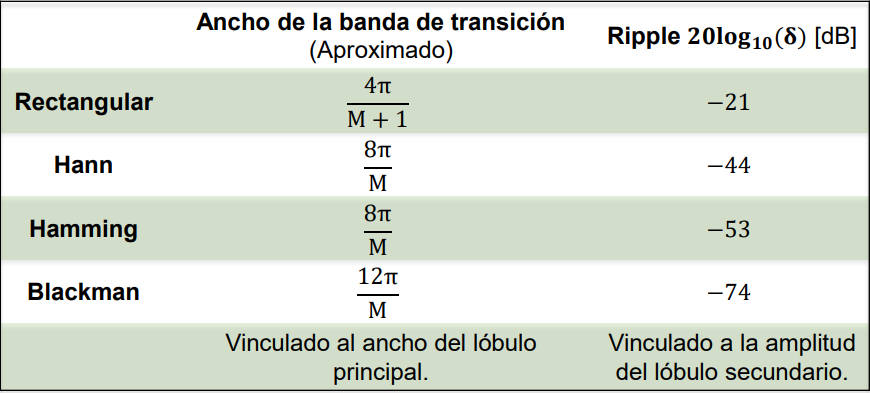

In [956]:
M=4*fs_1/fm_bp
if M%2==0:
  M+=1
print(M,"Será el orden del filtro")
print("El ancho de banda de transición será de: ", (8*np.pi/M))

1765.0 Será el orden del filtro
El ancho de banda de transición será de:  0.014239513444033057


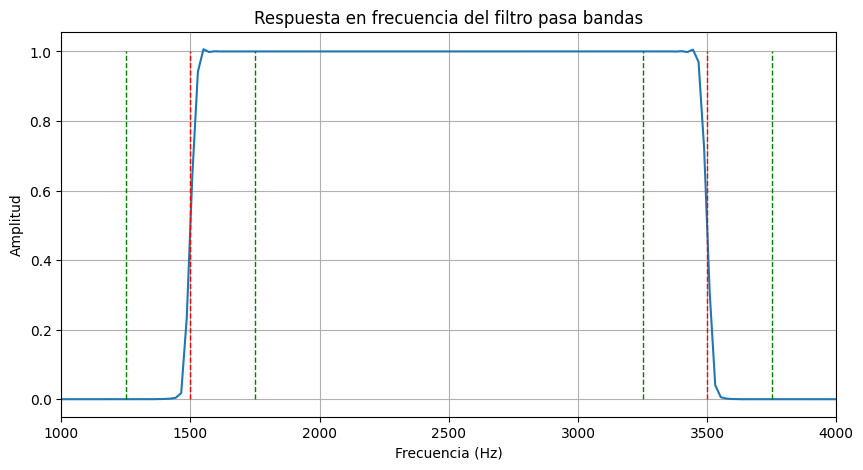

In [957]:
wc1_bp = 2 * np.pi * (fc1_bp / fs_1)
wc2_bp = 2 * np.pi * (fc2_bp / fs_1)
n = np.arange(-(M//2+1), M//2+1)

hi_bp = wc2_bp/np.pi*np.sinc(wc2_bp*n/np.pi) - wc1_bp/np.pi*np.sinc(wc1_bp*n/np.pi)
#hi_pb = np.where(M == 0, wc_pb / np.pi, hi_pb)
hi_bp[M==0]=(wc2_bp-wc1_bp)/np.pi
win_bp = 0.5*(1- np.cos(2 * np.pi * np.arange(len(n)) / (M - 1)))

h_n_bp=hi_bp * win_bp
w,h=sp.freqz(h_n_bp,1,whole=True,worN=2048)


plt.figure(figsize=(10, 5))
plt.title("Respuesta en frecuencia del filtro pasa bandas")
plt.plot((w-np.pi)*fs_1/(2*np.pi), np.abs(np.fft.fftshift(h)), label="$Filtro$")
plt.vlines(fc1_bp,0,1,color='r',lw=1,linestyle="--",label="$$F_c")
plt.vlines(fc2_bp,0,1,color='r',lw=1,linestyle="--",label="$$F_c")
plt.vlines(fc1_bp+fm_pb/2,0,1,color='g',lw=1,linestyle="--",label="$$F_c+f_m/2")
plt.vlines(fc1_bp-fm_pb/2,0,1,color='g',lw=1,linestyle="--",label="$$F_c+f_m/2")
plt.vlines(fc2_bp+fm_pb/2,0,1,color='g',lw=1,linestyle="--",label="$$F_c+f_m/2")
plt.vlines(fc2_bp-fm_pb/2,0,1,color='g',lw=1,linestyle="--",label="$$F_c+f_m/2")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim([1000,4000])
plt.grid()
plt.show()

FILTROS FIR POR METODO DE MUESTREO EN FRECUENCIA


Filtro pasa altas. Fs=44100. Fc=4500

In [958]:
N = 300

# Filtro pasa altas
if N % 2 == 0:
    kmax = N//2-1
else:
    kmax = (N-1)//2
alpha = (N-1)/2
paso = fs_1/N

Parametro H(k)

In [959]:
H_k = []
for k in range(kmax + 1):
    if paso * k >= 0 and paso * k <= 4.5e3:
        H_k.append(0)
    else:
        H_k.append(1)


Calculo de h(n)

In [960]:
h_n_pa = []

for n in range(N):
    suma = 0
    for k in np.arange(1, kmax + 1):
        suma += (1/ N) * 2 * H_k[k] * np.cos(2 * np.pi * k * (n - alpha) / N)
    suma += (1 / N) * H_k[0]
    h_n_pa.append(suma)


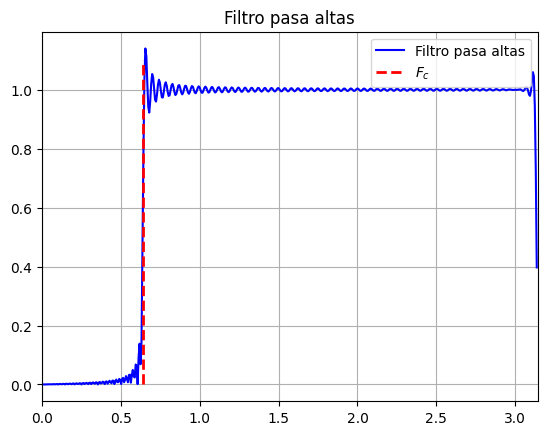

In [961]:
# Respuesta en frecuencia del filtro pasa altas
w, h = sp.freqz(h_n_pa, 1, whole=True, worN=1024)

plt.figure()
plt.title("Filtro pasa altas")
plt.plot((w - np.pi), np.abs(np.fft.fftshift(h)), 'b', label='Filtro pasa altas')
plt.vlines(2 * np.pi * 4.5e3 / fs_1, 0, 1.1, color='r', lw=2, linestyle='--', label='$F_c$')
plt.xlim([0,1*np.pi])
plt.legend()
plt.grid()
plt.show()


Filtro pasa bandas


In [962]:
N=1000
if N % 2 == 0:
    kmax = N//2-1
else:
    kmax = (N-1)//2
alpha = (N-1)/2
paso = fs_1/N

In [963]:

H_k = []
for k in range(kmax + 1):
    if (0.3e3<=paso*k<=1.6e3):
        H_k.append(1)
    else:
        H_k.append(0)

In [964]:

h_n_bp2 = []

for n in range(N):
    suma = 0
    for k in range(1, kmax + 1):
        # Asegúrate de que H_k tenga al menos kmax + 1 elementos
        if k < len(H_k):
            suma += (1 / N) * 2 * H_k[k] * np.cos(2 * np.pi * k * (n - alpha) / N)
    # Asegúrate de que H_k tenga al menos 1 elemento
    if len(H_k) > 0:
        suma += (1 / N) * H_k[0]
    h_n_bp2.append(suma)

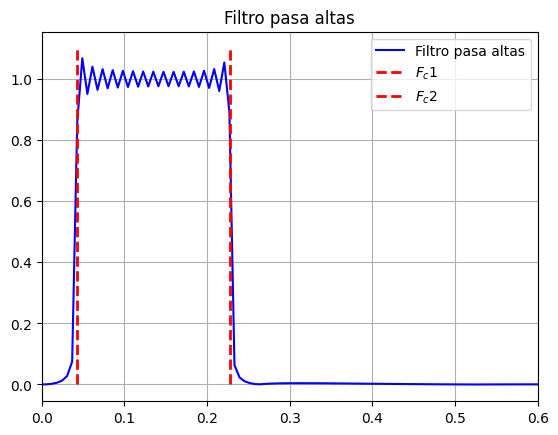

In [965]:
w, h = sp.freqz(h_n_bp2, 1, whole=True, worN=1024)

plt.figure()
plt.title("Filtro pasa altas")
plt.plot((w - np.pi), np.abs(np.fft.fftshift(h)), 'b', label='Filtro pasa altas')
plt.vlines(2 * np.pi * 300 / fs_1, 0, 1.1, color='r', lw=2, linestyle='--', label='$F_c1$')
plt.vlines(2 * np.pi * 1600 / fs_1, 0, 1.1, color='r', lw=2, linestyle='--', label='$F_c2$')
plt.xlim([0,0.6])
plt.legend()
plt.grid()

FILTRADO DE SONIDOS


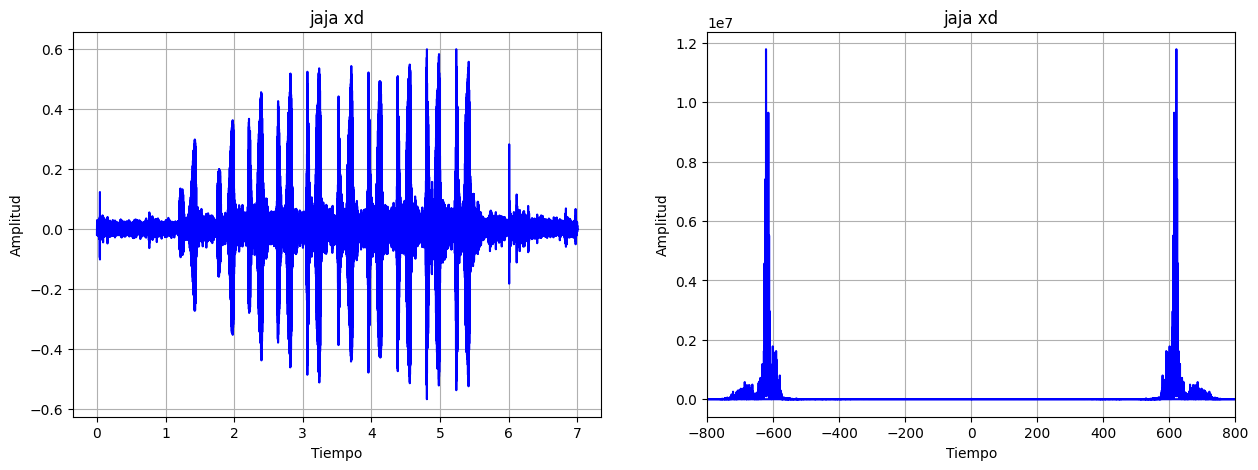

In [966]:
x1=np.convolve(h_n_pb,Norm_Audio_1, mode="same")
x2=np.fft.fft(x1)
frec_fourier=np.fft.fftfreq(len(x2))*fs_1

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t_1, x1, 'b')
plt.title("jaja xd")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid(True)

plt.subplot(122)
plt.plot(frec_fourier, abs(x2)**2, 'b')
plt.title("jaja xd")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.xlim([-800,800])
plt.grid(True)
plt.show()

Audio(x1,rate=fs_1)

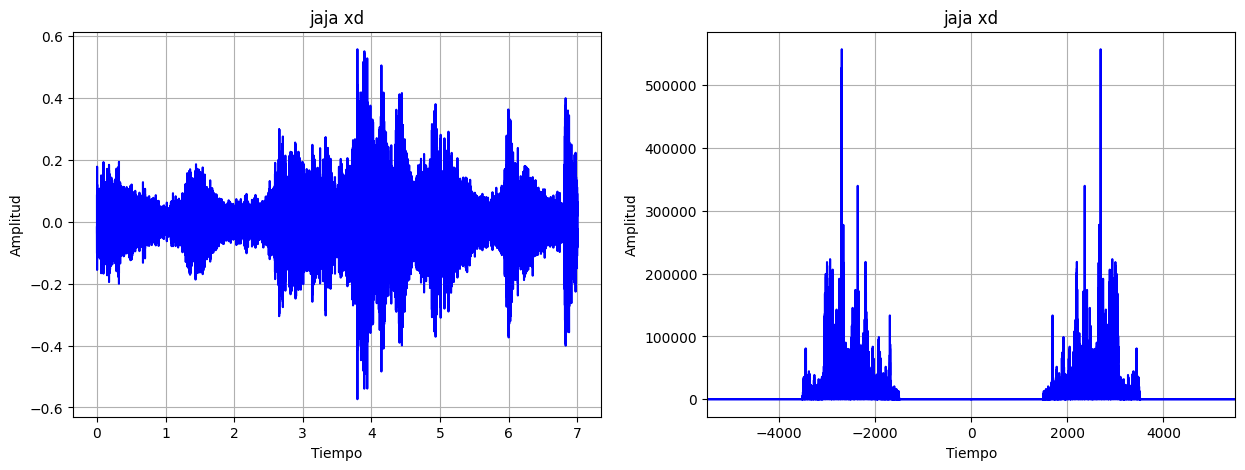

In [967]:
x1=np.convolve(h_n_bp,Norm_Audio_1, mode="same")
x2=np.fft.fft(x1)
frec_fourier=np.fft.fftfreq(len(x2))*fs_1

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t_1, x1, 'b')
plt.title("jaja xd")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid(True)

plt.subplot(122)
plt.plot(frec_fourier, abs(x2)**2, 'b')
plt.title("jaja xd")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.xlim([-5500,5500])
plt.grid(True)
plt.show()

Audio(x1,rate=fs_1)

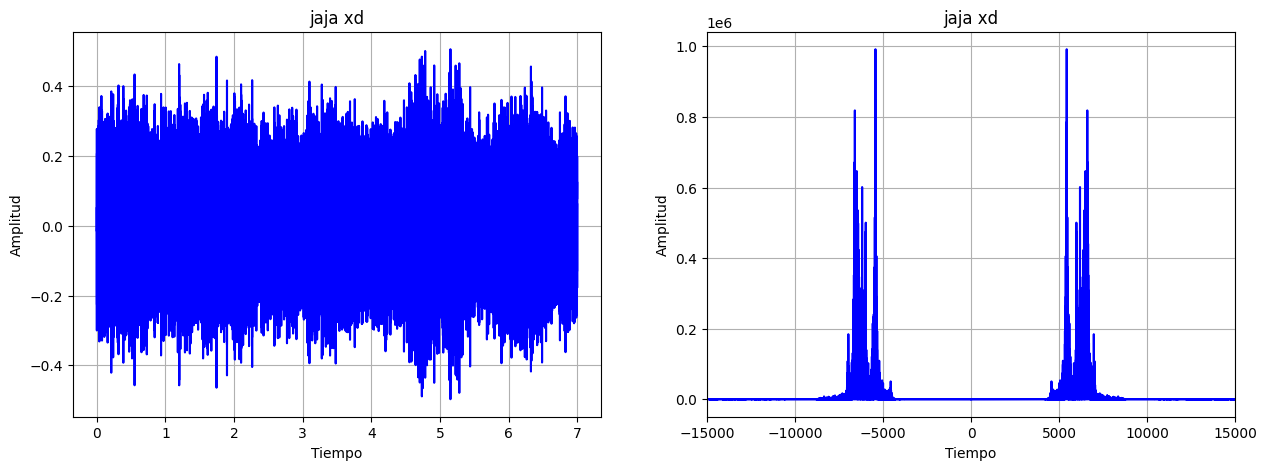

In [968]:
x1=np.convolve(h_n_pa,Norm_Audio_1, mode="same")
x2=np.fft.fft(x1)
frec_fourier=np.fft.fftfreq(len(x2))*fs_1

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t_1, x1, 'b')
plt.title("jaja xd")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid(True)

plt.subplot(122)
plt.plot(frec_fourier, abs(x2)**2, 'b')
plt.title("jaja xd")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.xlim([-15000,15000])
plt.grid(True)
plt.show()

Audio(x1,rate=fs_1)

FILTROS IRR

Con este tipos de filtros, se resuelven las restricciones inherentes a los demás métodos mencionados, ya que este método es aplicable a cualquier tipo de filtro.

In [970]:
def filtrado_musica_IIR (b_type,a_type,Norm_Audio_,t_):


    y = sp.lfilter(b_type, a_type, Norm_Audio_)

    plt.figure(figsize=(18,4))
    plt.plot(t_,y)
    plt.xlabel("Tiempo[s]")
    plt.ylabel("Amplitud")
    plt.title("Señal filtrada con pasa banda")
    plt.grid()
    plt.show()


    N=512
    plt.figure(figsize=(16,6))

    W,H = sp.freqz(Norm_Audio_,1,whole=True, worN=N)
    plt.plot((W-np.pi)*fs_1/(2*np.pi),np.abs(np.fft.fftshift(H))/max(np.fft.fftshift(H)), label='Espectro después de filtrar')
    plt.axis(xmax=fs_1/2,xmin=-fs_1/2)

    W,H = sp.freqz(y,1,whole=True, worN=N)
    plt.plot((W-np.pi)*fs_1/(2*np.pi),np.abs(np.fft.fftshift(H))/max(np.fft.fftshift(H)), label='Espectro después de filtrar')
    plt.axis(xmax=fs_1/2,xmin=-fs_1/2)

    plt.title('Espectro de la señal')
    plt.xlabel('Frecuencia')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid()
    plt.show()

    return y

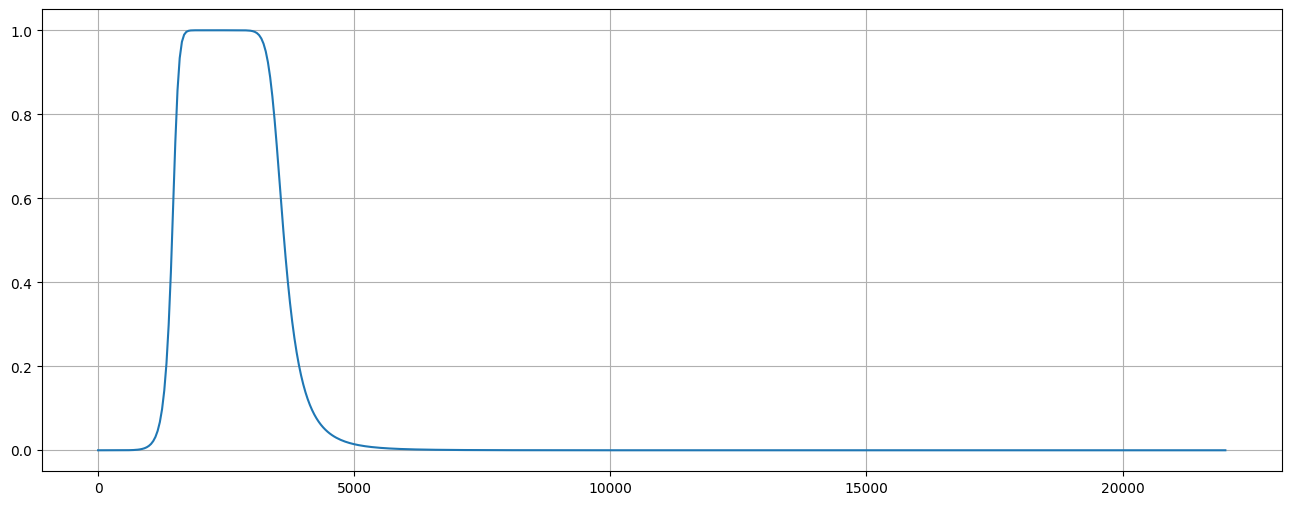

In [973]:

import scipy.signal as sp

F_corte1=fc1_bp
F_corte2=fc2_bp
Wn1=2*F_corte1/fs_1
Wn2=2*F_corte2/fs_1

plt.figure(figsize=(16,6))


#Filtro IIR ButterWorth
b_butter, a_butter = sp.butter(6, [Wn1,Wn2], btype='bandpass', analog=False, output='ba', fs=None)
wb_butter, Hb_butter = sp.freqz(b_butter, a_butter);
plt.plot((wb_butter*fs_1)/(2*np.pi), np.abs(Hb_butter), label = 'Butterworth')
plt.grid()


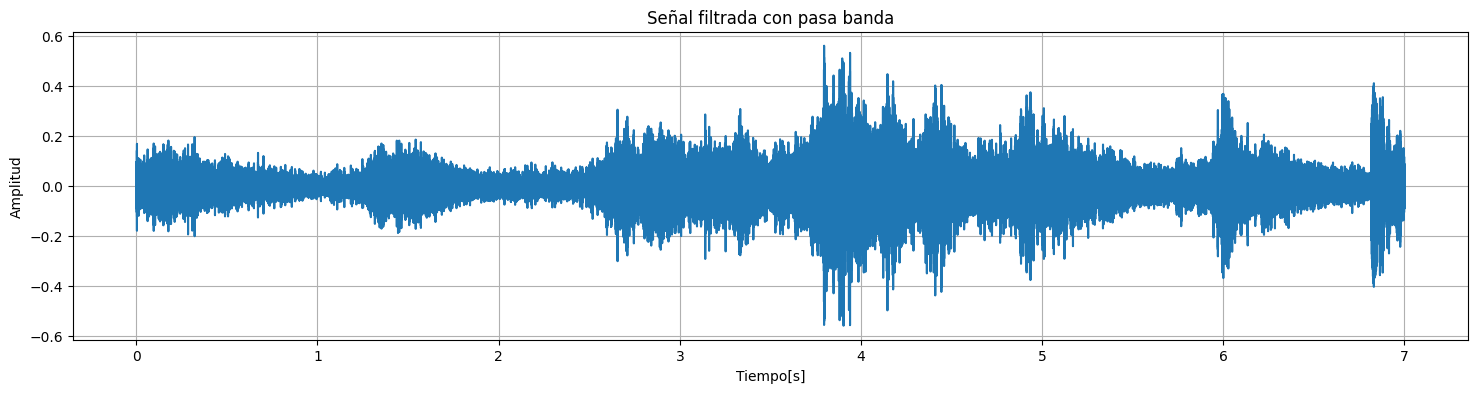

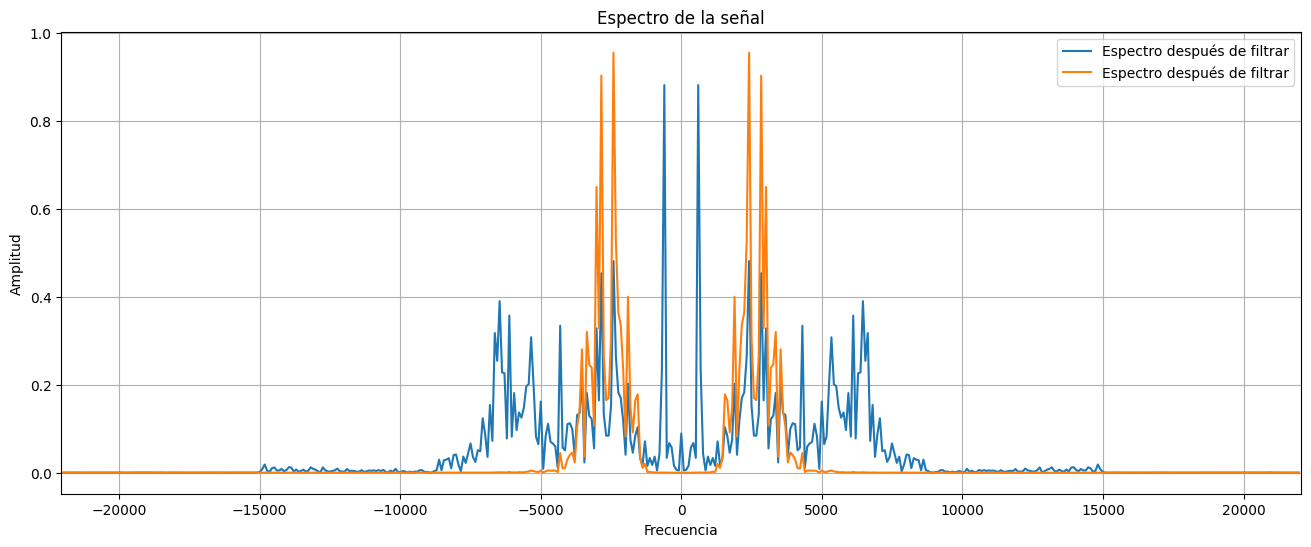

In [974]:
Filtro_IIR_Butter = filtrado_musica_IIR (b_butter,a_butter,Norm_Audio_1,t_1)
Audio (Filtro_IIR_Butter, rate = 44100)